# Manish Mapakshi(015926729)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

import pickle
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df=pd.read_csv("/Users/manishmapakshi/Downloads/dataset_small.csv")

# Data Preprocessing

In [22]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

## Using "phishing" feature to find the frequency of both phishing and non-phishing websites value_counts() and countplot() functions

In [23]:
df['phishing'].value_counts()

1    30647
0    27998
Name: phishing, dtype: int64

Text(0.5, 1.0, 'Frequency of Both labels ')

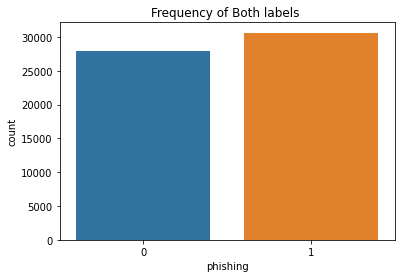

In [24]:
sns.countplot(df.phishing)
plt.title('Frequency of Both labels ')

In [26]:
print("No of duplicate columns: ",df.duplicated(keep='first').sum())
#dropping duplicate rows
df.drop_duplicates(inplace=True)

No of duplicate columns:  1240


## We are using variance threshold for feature selection. Dropping all the 13 columns which doesn't meet the threshold value.

In [27]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(len(constant_columns))
constant_columns
        
#These columns can be dropped 
df_imp = df.drop(constant_columns,axis=1,inplace =True)

13


## In the cell below, we are checking the percentage of '-1' values present in each and every feature.

In [28]:
missing_data_cols = {}
for col in df_imp.columns:
    values = (df_imp[col].values == -1).sum()
    if not values == 0:
        missing_data_cols[col] = df_imp[col].values
df_imp = df_imp.drop(missing_data_cols,axis= 1)
negative_one_data = pd.DataFrame (missing_data_cols) 

## In the cell below, we are converting the values of '-1' to Nan.


In [32]:
def convert_to_nan(data):
    for col in df_imp.columns:
            d = df_imp[col].values
            d = d.astype("float")
            for i in range(len(d)):
                if d[i] == -1.:
                    d[i] = np.nan
            df_imp[col] = d
    return df_imp
negative_one_data = convert_to_nan(negative_one_data)
negative_one_data.isna().sum() 

qty_dot_url                0
qty_hyphen_url             0
qty_underline_url          0
qty_slash_url              0
qty_questionmark_url       0
                        ... 
qty_redirects           4280
url_google_index           4
domain_google_index        2
url_shortened              0
phishing                   0
Length: 99, dtype: int64

## Checking the columns that has -1 value. -1 value can be considered as a unique category. -1 can be replaced with NaN. We can later find these values using Mean, KNN imputer and MissForest imputer.

In [ ]:
#columns that have '-1'
df.columns[df.isin([-1]).any()]

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params

## In the below cell, we are using missing number library to plot missing values. From the figure, we can say that there are a lot of missing params values.

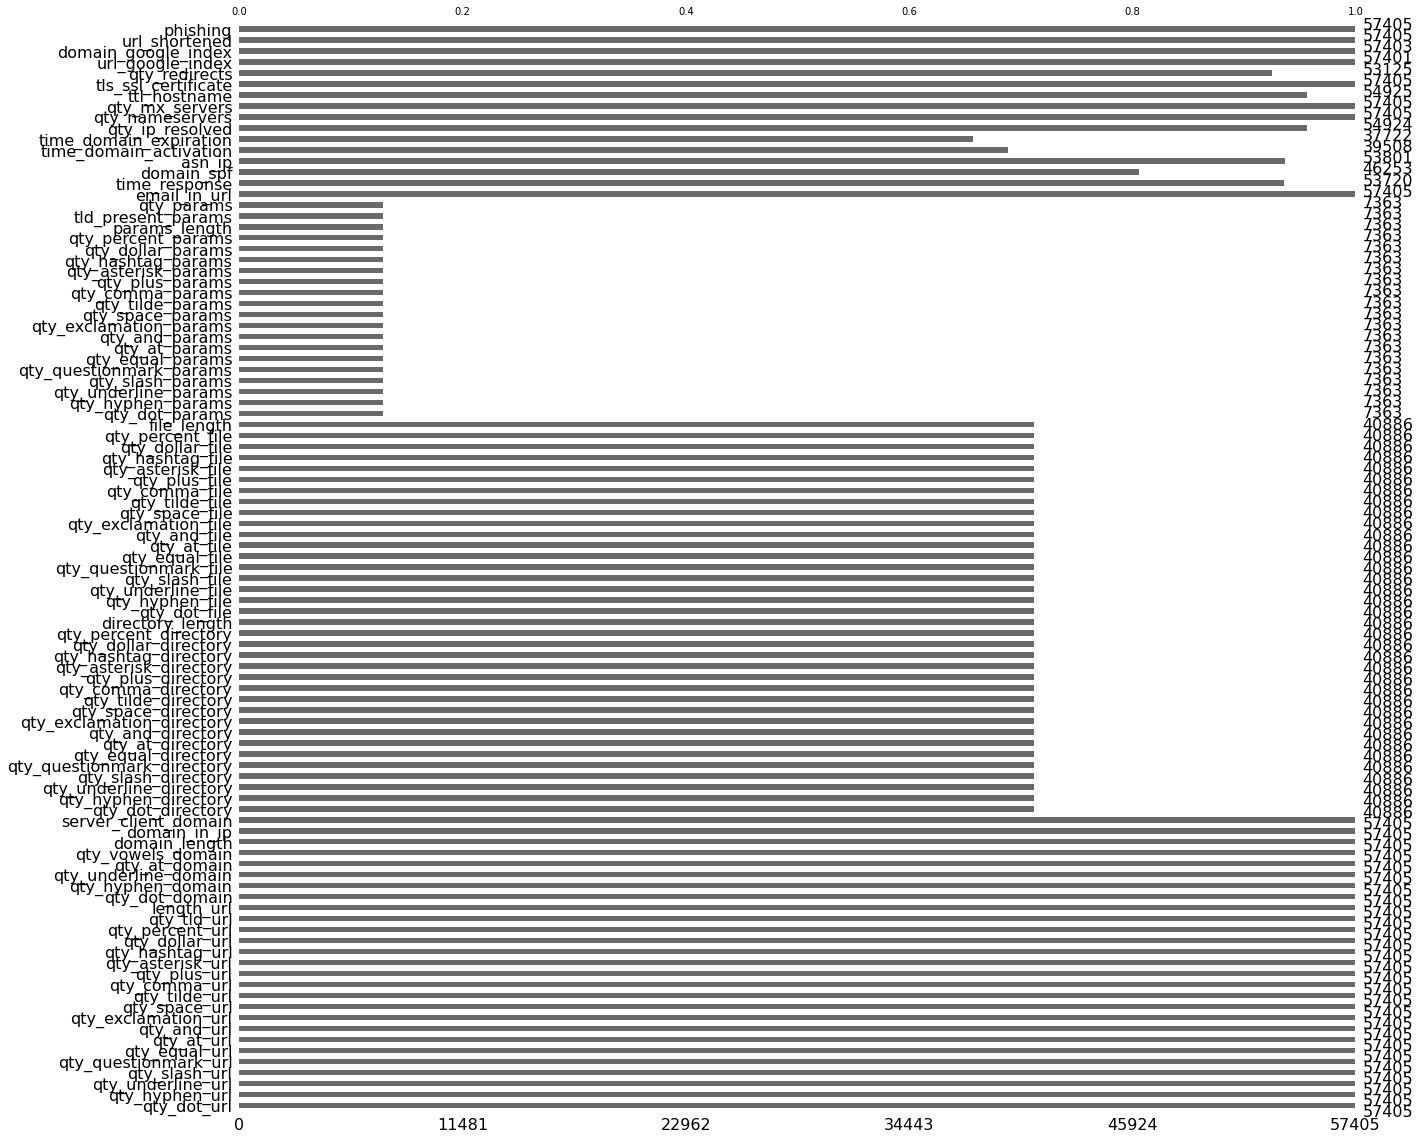

In [33]:
msno.bar(negative_one_data,figsize = (20,20))

## In the cell below, we are plotting a figure to produce heatmap for the missing data.

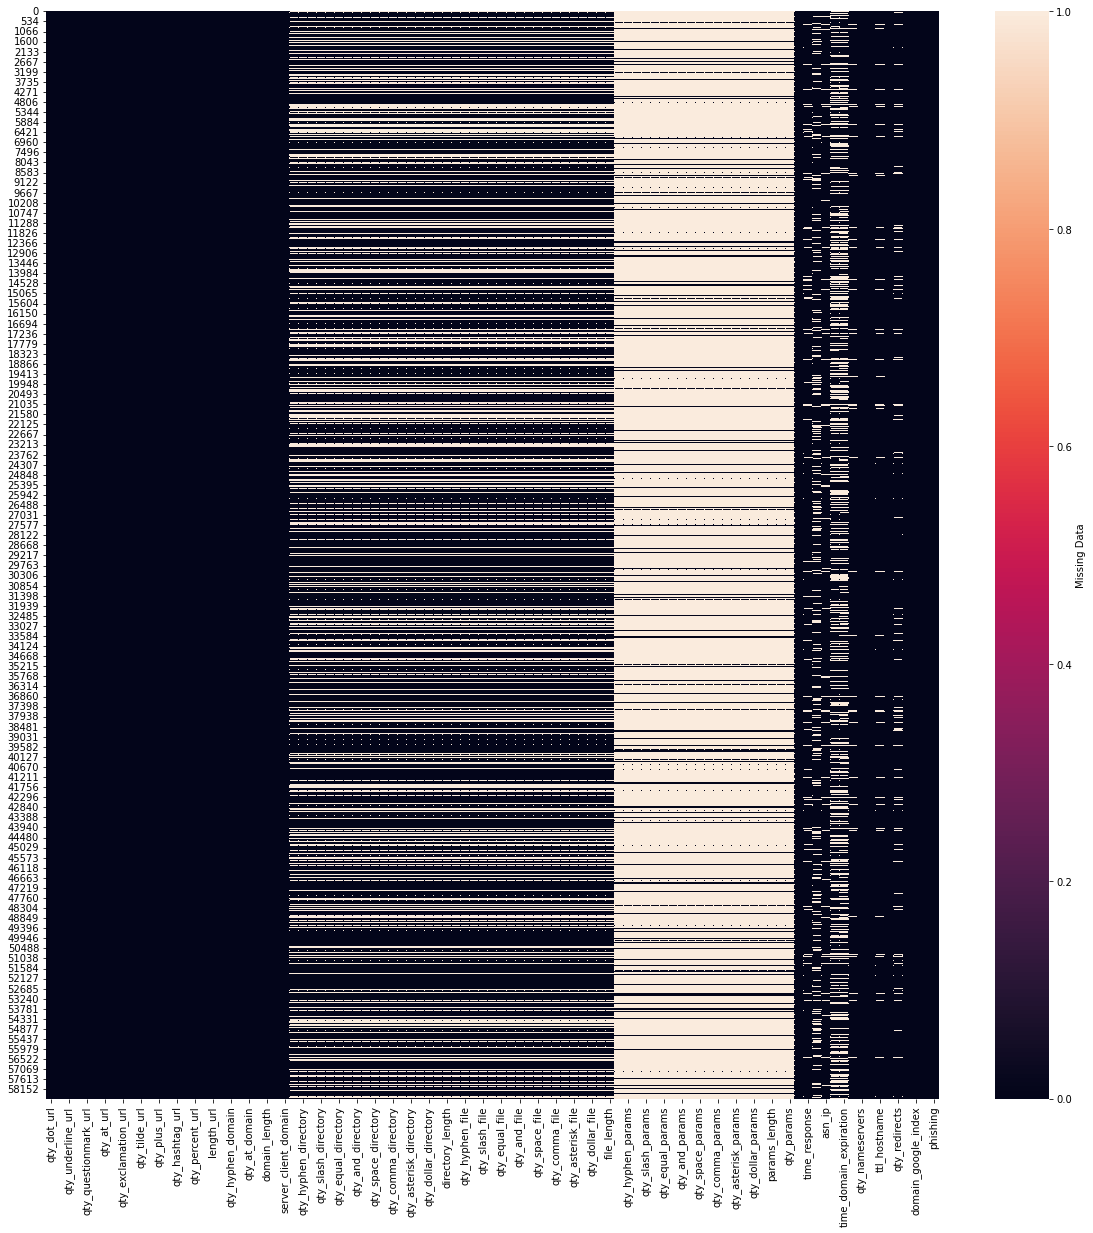

In [35]:
#missing values before imputation
plt.figure(figsize=(20,20))
sns.heatmap(df_imp.isna(),cbar_kws={'label':'Missing Data'})

In [36]:
features_to_be_removed = ["qty_dot_params", "qty_hyphen_params", "qty_underline_params",
                                   "qty_slash_params", "qty_questionmark_params",
                                   "qty_equal_params", "qty_at_params", "qty_and_params",
                                   "qty_exclamation_params", "qty_space_params", 
                                   "qty_tilde_params", "qty_comma_params", "qty_plus_params", 
                                   "qty_asterisk_params", "qty_hashtag_params", 
                                   "qty_dollar_params", "qty_percent_params", "params_length",
                                   "tld_present_params", "qty_params"]
negative_one_data = negative_one_data.drop(features_to_be_removed,axis=1)

In [37]:
negative_one_data.shape


(57405, 79)

# Sai Gowtham Ande

# Mean Imputation

# KNN Imputation